In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os
from pathlib import Path

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:

data_normal = np.load('../Data/정상베어링.npy')

In [3]:
data_normal.shape

(33030144,)

In [12]:
x_0 = data_normal[:24000000]
x_0 = x_0.reshape(-1,1)

(24000000, 1)

In [11]:
#데이터 전처리 (정규화)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x_0)

In [17]:
x_data = np.array(x)
x_data = x_data.reshape(-1,480,1)

In [16]:
x_data.shape

(50000, 480, 1)

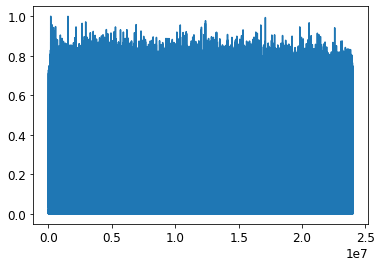

In [14]:
plt.plot(x)

In [18]:
x_train = x_data[:50000,:450]
x_train

array([[[0.03389775],
        [0.05070262],
        [0.06758181],
        ...,
        [0.09715699],
        [0.08928994],
        [0.0806773 ]],

       [[0.30722597],
        [0.30796924],
        [0.30694725],
        ...,
        [0.0792558 ],
        [0.09692239],
        [0.11459131]],

       [[0.08403131],
        [0.05908531],
        [0.0334425 ],
        ...,
        [0.28323229],
        [0.29103663],
        [0.29709892]],

       ...,

       [[0.10737463],
        [0.13471302],
        [0.16098994],
        ...,
        [0.02931967],
        [0.04957145],
        [0.06861542]],

       [[0.00256544],
        [0.00447425],
        [0.01046756],
        ...,
        [0.05212645],
        [0.03385362],
        [0.01555408]],

       [[0.12964021],
        [0.1500871 ],
        [0.16968852],
        ...,
        [0.05029847],
        [0.05151789],
        [0.05154809]]])

In [19]:
y_train = x_data[:50000,-1]
y_train.shape

(50000, 1)

In [20]:
x_test = x_data[:50000,450:]
y_test = x_data[:50000,-1]
y_test.shape

(50000, 1)

In [21]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])
optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 515s 329ms/step - loss: 0.0113
Epoch 2/20
1563/1563 [==============================] - 517s 331ms/step - loss: 0.0103
Epoch 3/20
1563/1563 [==============================] - 519s 332ms/step - loss: 0.0123
Epoch 4/20
1563/1563 [==============================] - 516s 330ms/step - loss: 0.0147
Epoch 5/20
1563/1563 [==============================] - 518s 332ms/step - loss: 0.0179
Epoch 6/20
1563/1563 [==============================] - 518s 331ms/step - loss: 0.0157
Epoch 7/20
1563/1563 [==============================] - 517s 331ms/step - loss: 0.0113
Epoch 8/20
1563/1563 [==============================] - 517s 331ms/step - loss: 0.0109
Epoch 9/20
1563/1563 [==============================] - 514s 329ms/step - loss: 0.0111
Epoch 10/20
1563/1563 [==============================] - 518s 331ms/step - loss: 0.0178
Epoch 11/20
1563/1563 [==============================] - 516s 330ms/step - loss: 0.0121
Epoch 12/20
1563/1563 [==================

In [ ]:
# 위에 예제를 보면 데이터는 총 24000000개 8분짜리 데이터입니다. 즉 1초에 5000개씩 총 480개가 이루어져 있는데 그 중 450개 즉 7.5초를 트레이닝 데이터로쓰고
#나머지 0.5초를 테스트데이터로 했습니다. y값은 매초 당 그래프의 소음값이 출력되는 형태로 역시 450 학습 30 테스트로 이루어져 있습니다. 
#즉 이 RNN 모델은 1초당 출력되는 소음 값을 예측하는 모델입니다.

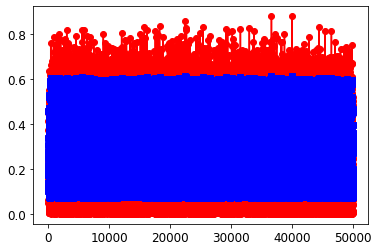

In [24]:
plt.plot(y_train, 'ro-', label="target")
plt.plot(model.predict(x_test), 'bs-', label="output")

ValueError: Classification metrics can't handle a mix of continuous and binary targets

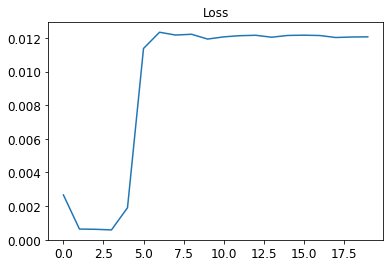

In [77]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

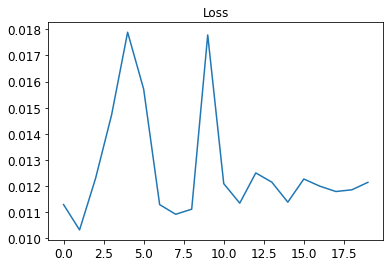

In [29]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

In [30]:
model.save('Gersang.h5')